Importing Liberaries


In [3]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


Uploading the dataset

In [6]:
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [7]:
# Import required libraries
import zipfile
import os

# Open the uploaded ZIP file
zip_ref = zipfile.ZipFile("archive (1).zip", "r")

# Extract all contents to a folder named "dataset"
zip_ref.extractall("dataset")

# Close the ZIP file
zip_ref.close()


In [8]:
# Define the correct path to your dataset
train_path = "dataset/data"

# Set image size and batch size
img_size = (128, 128)
batch_size = 32

# Import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generator with rescaling
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% for validation

# Load training data from folder structure
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 80% of data for training
)

val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use 20% of data for validation
)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


Model Building

In [9]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Compiling

In [10]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


Model Training

In [11]:
# Train the model using train and validation data
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 54/189 ━━━━━━━━━━━━━━━━━━━━ 1:50 819ms/step - accuracy: 0.6466 - loss: 0.8402

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 173s 899ms/step - accuracy: 0.7648 - loss: 0.5591 - val_accuracy: 0.9166 - val_loss: 0.2323
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 169s 893ms/step - accuracy: 0.9002 - loss: 0.2458 - val_accuracy: 0.9099 - val_loss: 0.2364
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 168s 890ms/step - accuracy: 0.9203 - loss: 0.2011 - val_accuracy: 0.9238 - val_loss: 0.2034
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 168s 888ms/step - accuracy: 0.9415 - loss: 0.1503 - val_accuracy: 0.9331 - val_loss: 0.2059
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 167s 883ms/step - accuracy: 0.9616 - loss: 0.0958 - val_accuracy: 0.9364 - val_loss: 0.2039
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 168s 888ms/step - accuracy: 0.9740 - loss: 0.0739 - val_accuracy: 0.9424 - val_loss: 0.1798
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 167s 886ms/step - accuracy: 0.9817 - loss: 0.0519 - val_accuracy: 0.9444 - val_loss: 0.2252
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 167s 882ms/step - accuracy: 0.9820 - loss: 0.04

Statistics

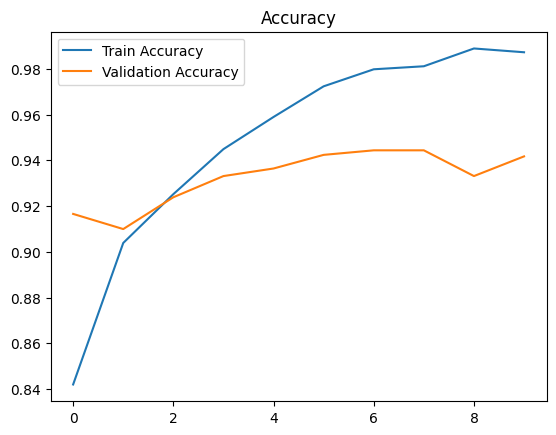

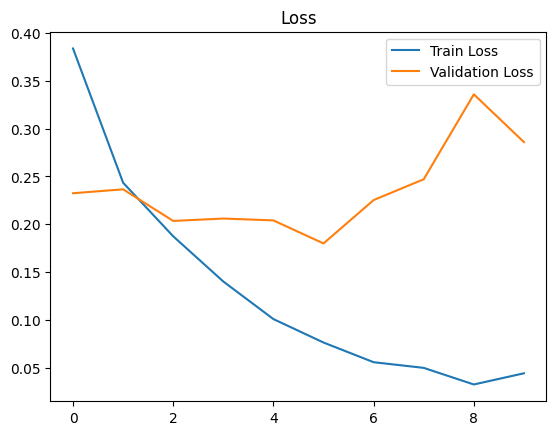

In [12]:
# Plot training and validation accuracy/loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()


In [13]:
# Save the model to use later
model.save("face_mask_detector_model.h5")


Model Testing

In [16]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-08-06 154402.png to Screenshot 2025-08-06 154402.png


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_size = (128, 128)

# Replace 'your_image.jpg' with the actual image filename
img = image.load_img("Screenshot 2025-08-06 154402.png", target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [19]:
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("❌ No Mask Detected")
else:
    print("😷 Mask Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
❌ No Mask Detected


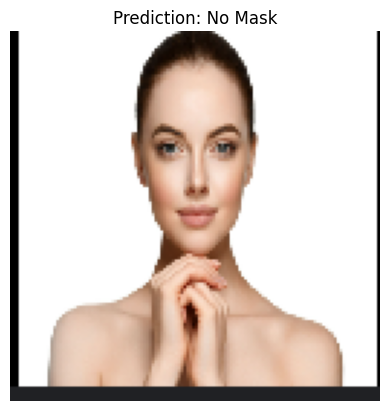

In [20]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')

label = "No Mask" if prediction[0][0] > 0.5 else "With Mask"
plt.title(f"Prediction: {label}")
plt.show()


In [26]:
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Image 2025-08-06 at 5.05.57 PM.jpeg to WhatsApp Image 2025-08-06 at 5.05.57 PM.jpeg


In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_size = (128, 128)

# Replace 'your_image.jpg' with the actual image filename
img = image.load_img("WhatsApp Image 2025-08-06 at 5.05.57 PM.jpeg", target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [28]:
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("❌ No Mask Detected")
else:
    print("😷 Mask Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
😷 Mask Detected


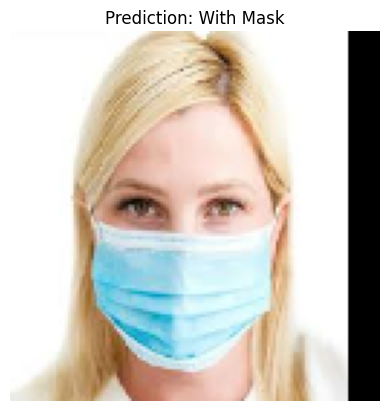

In [25]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')

label = "No Mask" if prediction[0][0] > 0.5 else "With Mask"
plt.title(f"Prediction: {label}")
plt.show()
